In [5]:
!pip install wordcloud

In [6]:
import pandas as pd
import numpy as np 
import spacy 

from spacy.lang.en.stop_words import STOP_WORDS as stopwords

from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
data = pd.read_excel('/content/drive/MyDrive/DataSets/QLC /Data1.xlsx')
data.head()

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#ProformaInvoice\r\nDear Sir,\r\n\r\nThanks for Order Confirmation.\r\nPlease find attached Proforma Invoices.\r\n\r\nWe request you to transfer the funds via NEFT on below bank details.\r\n\r\n\r\n\r\nPlease intimate once done.\r\n\r\nFeel free to mail us in case of any queries you may have.\r\nNote:-Payment will be 100% advance against Proforma Invoice.\r\n \r\n\r\nThanks & Regards,\r\nAkshada Gaikwad\r\nInside Sales"
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#Emailed\r\nDear Sir,\r\n\r\nPlease find revised Proforma Invoice.\r\n\r\nKindly make the payment we will let you know once the visit is schedule.\r\n\r\nThanks & Regards,\r\n\r\nAkshada Gaikwad\r\n\r\nQLC"
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n Proposal : MailHosting\r\n Feature Guide\r\n Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You."
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n Proposal : MailHosting\r\n Feature Guide\r\n Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You."
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up\r\n\r\nCalled on landline number\r\ndiscussed regaring proposal\r\nsaid she is on leave \r\nwill be back on monday


In [8]:
data.isnull().sum()


Unnamed: 0                0
OpportunityId             0
OpportunityStageName      0
ActivityDescription     128
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215508 entries, 0 to 215635
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            215508 non-null  int64 
 1   OpportunityId         215508 non-null  object
 2   OpportunityStageName  215508 non-null  object
 3   ActivityDescription   215508 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.2+ MB


In [11]:
data['OpportunityStageName'].value_counts()

Closed Dead           104531
Closed Won             60046
Proposal               21087
Prospecting            19560
Closed Lost             7244
Closed Happy Free       1203
Evaluating               760
Demonstration            451
Negotiating              339
Reversal                 223
Need  Analysis            36
Lead Qualification        21
Overdue                    7
Name: OpportunityStageName, dtype: int64

# Word Counts 

In [12]:
data['word_count'] = data['ActivityDescription'].apply(lambda x: len(str(x).split()))

In [13]:
data.head()

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription,word_count
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#ProformaInvoice\r\nDear Sir,\r\n\r\nThanks for Order Confirmation.\r\nPlease find attached Proforma Invoices.\r\n\r\nWe request you to transfer the funds via NEFT on below bank details.\r\n\r\n\r\n\r\nPlease intimate once done.\r\n\r\nFeel free to mail us in case of any queries you may have.\r\nNote:-Payment will be 100% advance against Proforma Invoice.\r\n \r\n\r\nThanks & Regards,\r\nAkshada Gaikwad\r\nInside Sales",57
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#Emailed\r\nDear Sir,\r\n\r\nPlease find revised Proforma Invoice.\r\n\r\nKindly make the payment we will let you know once the visit is schedule.\r\n\r\nThanks & Regards,\r\n\r\nAkshada Gaikwad\r\n\r\nQLC",28
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n Proposal : MailHosting\r\n Feature Guide\r\n Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You.",56
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n Proposal : MailHosting\r\n Feature Guide\r\n Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You.",56
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up\r\n\r\nCalled on landline number\r\ndiscussed regaring proposal\r\nsaid she is on leave \r\nwill be back on monday,19


In [14]:
print(data['word_count'].max())
print(data['word_count'].min())


671
0


In [15]:
data[data['word_count']==0]

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription,word_count
77882,77882,5DF0D624-E540-49F6-A860-7681701C8B55,Closed Dead,\r\n \r\n,0


# Characters Count

In [16]:
def char_count(x):
  s = x.split()
  x = ''.join(s)
  return len(x)

In [17]:
data['char_count'] = data['ActivityDescription'].apply(lambda x: char_count(str(x)))

In [18]:
#Label encoding target variable
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['OpportunityStageName']= label_encoder.fit_transform(data['OpportunityStageName']) 

In [19]:
data.head()

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription,word_count,char_count
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,3,"#ProformaInvoice\r\nDear Sir,\r\n\r\nThanks for Order Confirmation.\r\nPlease find attached Proforma Invoices.\r\n\r\nWe request you to transfer the funds via NEFT on below bank details.\r\n\r\n\r\n\r\nPlease intimate once done.\r\n\r\nFeel free to mail us in case of any queries you may have.\r\nNote:-Payment will be 100% advance against Proforma Invoice.\r\n \r\n\r\nThanks & Regards,\r\nAkshada Gaikwad\r\nInside Sales",57,303
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,3,"#Emailed\r\nDear Sir,\r\n\r\nPlease find revised Proforma Invoice.\r\n\r\nKindly make the payment we will let you know once the visit is schedule.\r\n\r\nThanks & Regards,\r\n\r\nAkshada Gaikwad\r\n\r\nQLC",28,140
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,10,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n Proposal : MailHosting\r\n Feature Guide\r\n Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You.",56,295
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,10,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n Proposal : MailHosting\r\n Feature Guide\r\n Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You.",56,295
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,10,#Follow up\r\n\r\nCalled on landline number\r\ndiscussed regaring proposal\r\nsaid she is on leave \r\nwill be back on monday,19,90


In [20]:
#Average Word Length 
data['avg_wdlen'] = data['char_count'] / data['word_count']

In [21]:
data.head()

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription,word_count,char_count,avg_wdlen
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,3,"#ProformaInvoice\r\nDear Sir,\r\n\r\nThanks for Order Confirmation.\r\nPlease find attached Proforma Invoices.\r\n\r\nWe request you to transfer the funds via NEFT on below bank details.\r\n\r\n\r\n\r\nPlease intimate once done.\r\n\r\nFeel free to mail us in case of any queries you may have.\r\nNote:-Payment will be 100% advance against Proforma Invoice.\r\n \r\n\r\nThanks & Regards,\r\nAkshada Gaikwad\r\nInside Sales",57,303,5.32
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,3,"#Emailed\r\nDear Sir,\r\n\r\nPlease find revised Proforma Invoice.\r\n\r\nKindly make the payment we will let you know once the visit is schedule.\r\n\r\nThanks & Regards,\r\n\r\nAkshada Gaikwad\r\n\r\nQLC",28,140,5.00
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,10,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n Proposal : MailHosting\r\n Feature Guide\r\n Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You.",56,295,5.27
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,10,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n Proposal : MailHosting\r\n Feature Guide\r\n Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You.",56,295,5.27
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,10,#Follow up\r\n\r\nCalled on landline number\r\ndiscussed regaring proposal\r\nsaid she is on leave \r\nwill be back on monday,19,90,4.74


In [22]:
data['ActivityDescription'][0]

'#ProformaInvoice\r\nDear Sir,\r\n\r\nThanks for Order Confirmation.\r\nPlease find attached Proforma Invoices.\r\n\r\nWe request you to transfer the funds via NEFT on below bank details.\r\n\r\n\r\n\r\nPlease intimate once done.\r\n\r\nFeel free to mail us in case of any queries you may have.\r\nNote:-Payment will be 100% advance against Proforma Invoice.\r\n         \r\n\r\nThanks & Regards,\r\nAkshada Gaikwad\r\nInside Sales'

In [23]:
data['ActivityDescription'][10]

'#FollowUp\r\n_Spoke to Rakesh he informed the demo is done now he is using the app will let us knw the feedback by Monday.\r\nAsked him for WA group he requested to create the same.'

In [24]:
data['ActivityDescription'][145]

'#RevisedProformaInvoiceSent\r\n\r\nDear Tanya,\r\n\r\nWith reference to our discussion, kindly find attached revised proforma invoice for your reference.\r\n\r\nWe request you to transfer the funds via NEFT on below bank details.\r\n\r\nPlease provide us your GST Number.\r\n\r\n1) Bank Details\r\n\r\n\r\n    ACCOUNT NAME            : QUANTUMLINK COMMUNICATIONS PVT LTD.\r\n    BANK NAME                   : HDFC BANK LTD.\r\n    ACCOUNT NO.                : 0240 256 0000053\r\n    BRANCH ADDRESS         : SANDOZ HOUSE, DR. A B ROAD, WORLI, MUMBAI - 400 018, MAHARASHTRA, INDIA\r\n    RTGS/NEFT IFSC             : HDFC0000240\r\n\r\n  2) PAN No.                        : AAACQ0241N\r\n\r\n  3) SERVICE TAX No           : ST/MUM/DIV III/MRS/1052/04\r\n\r\n  4) E Mail ID                        : sales.mumbai@qlc.in / accounts-receivable@qlc.in\r\n\r\nNote: Please find attached herewith scanned copy of cheque and Certificate of registration for your reference.\r\n\r\nPrivacy Policy Link : https

In [25]:
data['ActivityDescription'][1240]

'#Followup\r\nHad a word with Pinaki asked to give discount in AMC asked to drop a mail to proceed ahead'

In [26]:
data['ActivityDescription'][14501]

'#FollwoUp\r\n\r\n-Spoken with Amit he informed his team is using it he asked to connect Ankit.'

In [27]:
dic = {'ActivityDescription': str,
       'OpportunityStageName': int}

In [28]:
df = data.astype(dic)

In [29]:
df

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription,word_count,char_count,avg_wdlen
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,3,"#ProformaInvoice\r\nDear Sir,\r\n\r\nThanks for Order Confirmation.\r\nPlease find attached Proforma Invoices.\r\n\r\nWe request you to transfer the funds via NEFT on below bank details.\r\n\r\n\r\n\r\nPlease intimate once done.\r\n\r\nFeel free to mail us in case of any queries you may have.\r\nNote:-Payment will be 100% advance against Proforma Invoice.\r\n \r\n\r\nThanks & Regards,\r\nAkshada Gaikwad\r\nInside Sales",57,303,5.32
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,3,"#Emailed\r\nDear Sir,\r\n\r\nPlease find revised Proforma Invoice.\r\n\r\nKindly make the payment we will let you know once the visit is schedule.\r\n\r\nThanks & Regards,\r\n\r\nAkshada Gaikwad\r\n\r\nQLC",28,140,5.00
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,10,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n Proposal : MailHosting\r\n Feature Guide\r\n Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You.",56,295,5.27
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,10,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n Proposal : MailHosting\r\n Feature Guide\r\n Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You.",56,295,5.27
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,10,#Follow up\r\n\r\nCalled on landline number\r\ndiscussed regaring proposal\r\nsaid she is on leave \r\nwill be back on monday,19,90,4.74
...,...,...,...,...,...,...,...
215631,215631,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,3,please send PI so we can process the same,9,33,3.67
215632,215632,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,3,Please send proposal to Yogiraj,5,27,5.40
215633,215633,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,3,"Dear Sir ,\r\n\r\nGreetings from QLC!! \r\n\r\n\r\nThank you so much for your valuable order.\r\n\r\n\r\nPlease find attached proforma invoice for EmailHosting & FieldSense Services for Yogiraj Presstech - Baramathi\r\n\r\nNote : Invoice will be generated only after receipt of payment.\r\n\r\n\r\nAlso, please find QLC Bank details where you can deposit payment in favor of ""QuantumLink Communications Pvt. Ltd""\r\n\r\n \r\n\r\n\r\nCheque in Favor of\r\n\t\r\n\r\nQuantumLink Communications Pvt Ltd\r\n\r\nBank Name\r\n\t\r\n\r\nHDFC Bank (Andheri East)\r\n\r\nAccount No.\r\n\t\r\n\r\n14252790000074\r\n\r\nIFSC Code\r\n\t\r\n\r\nHDFC0001425 \r\n\r\n\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\nThank You.\r\n\r\n\r\n",98,509,5.19
215634,215634,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,3,Payment will release on tomorrow,5,28,5.60


In [30]:
df['OpportunityStageName'].value_counts()

0     104531
3      60046
10     21087
11     19560
2       7244
1       1203
5        760
4        451
8        339
12       223
7         36
6         21
9          7
Name: OpportunityStageName, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
train,test =train_test_split(df,test_size= 0.25)

In [32]:
from autoviml.Auto_NLP import Auto_NLP

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

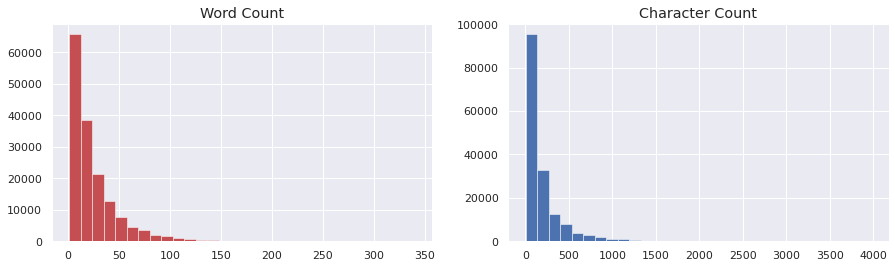

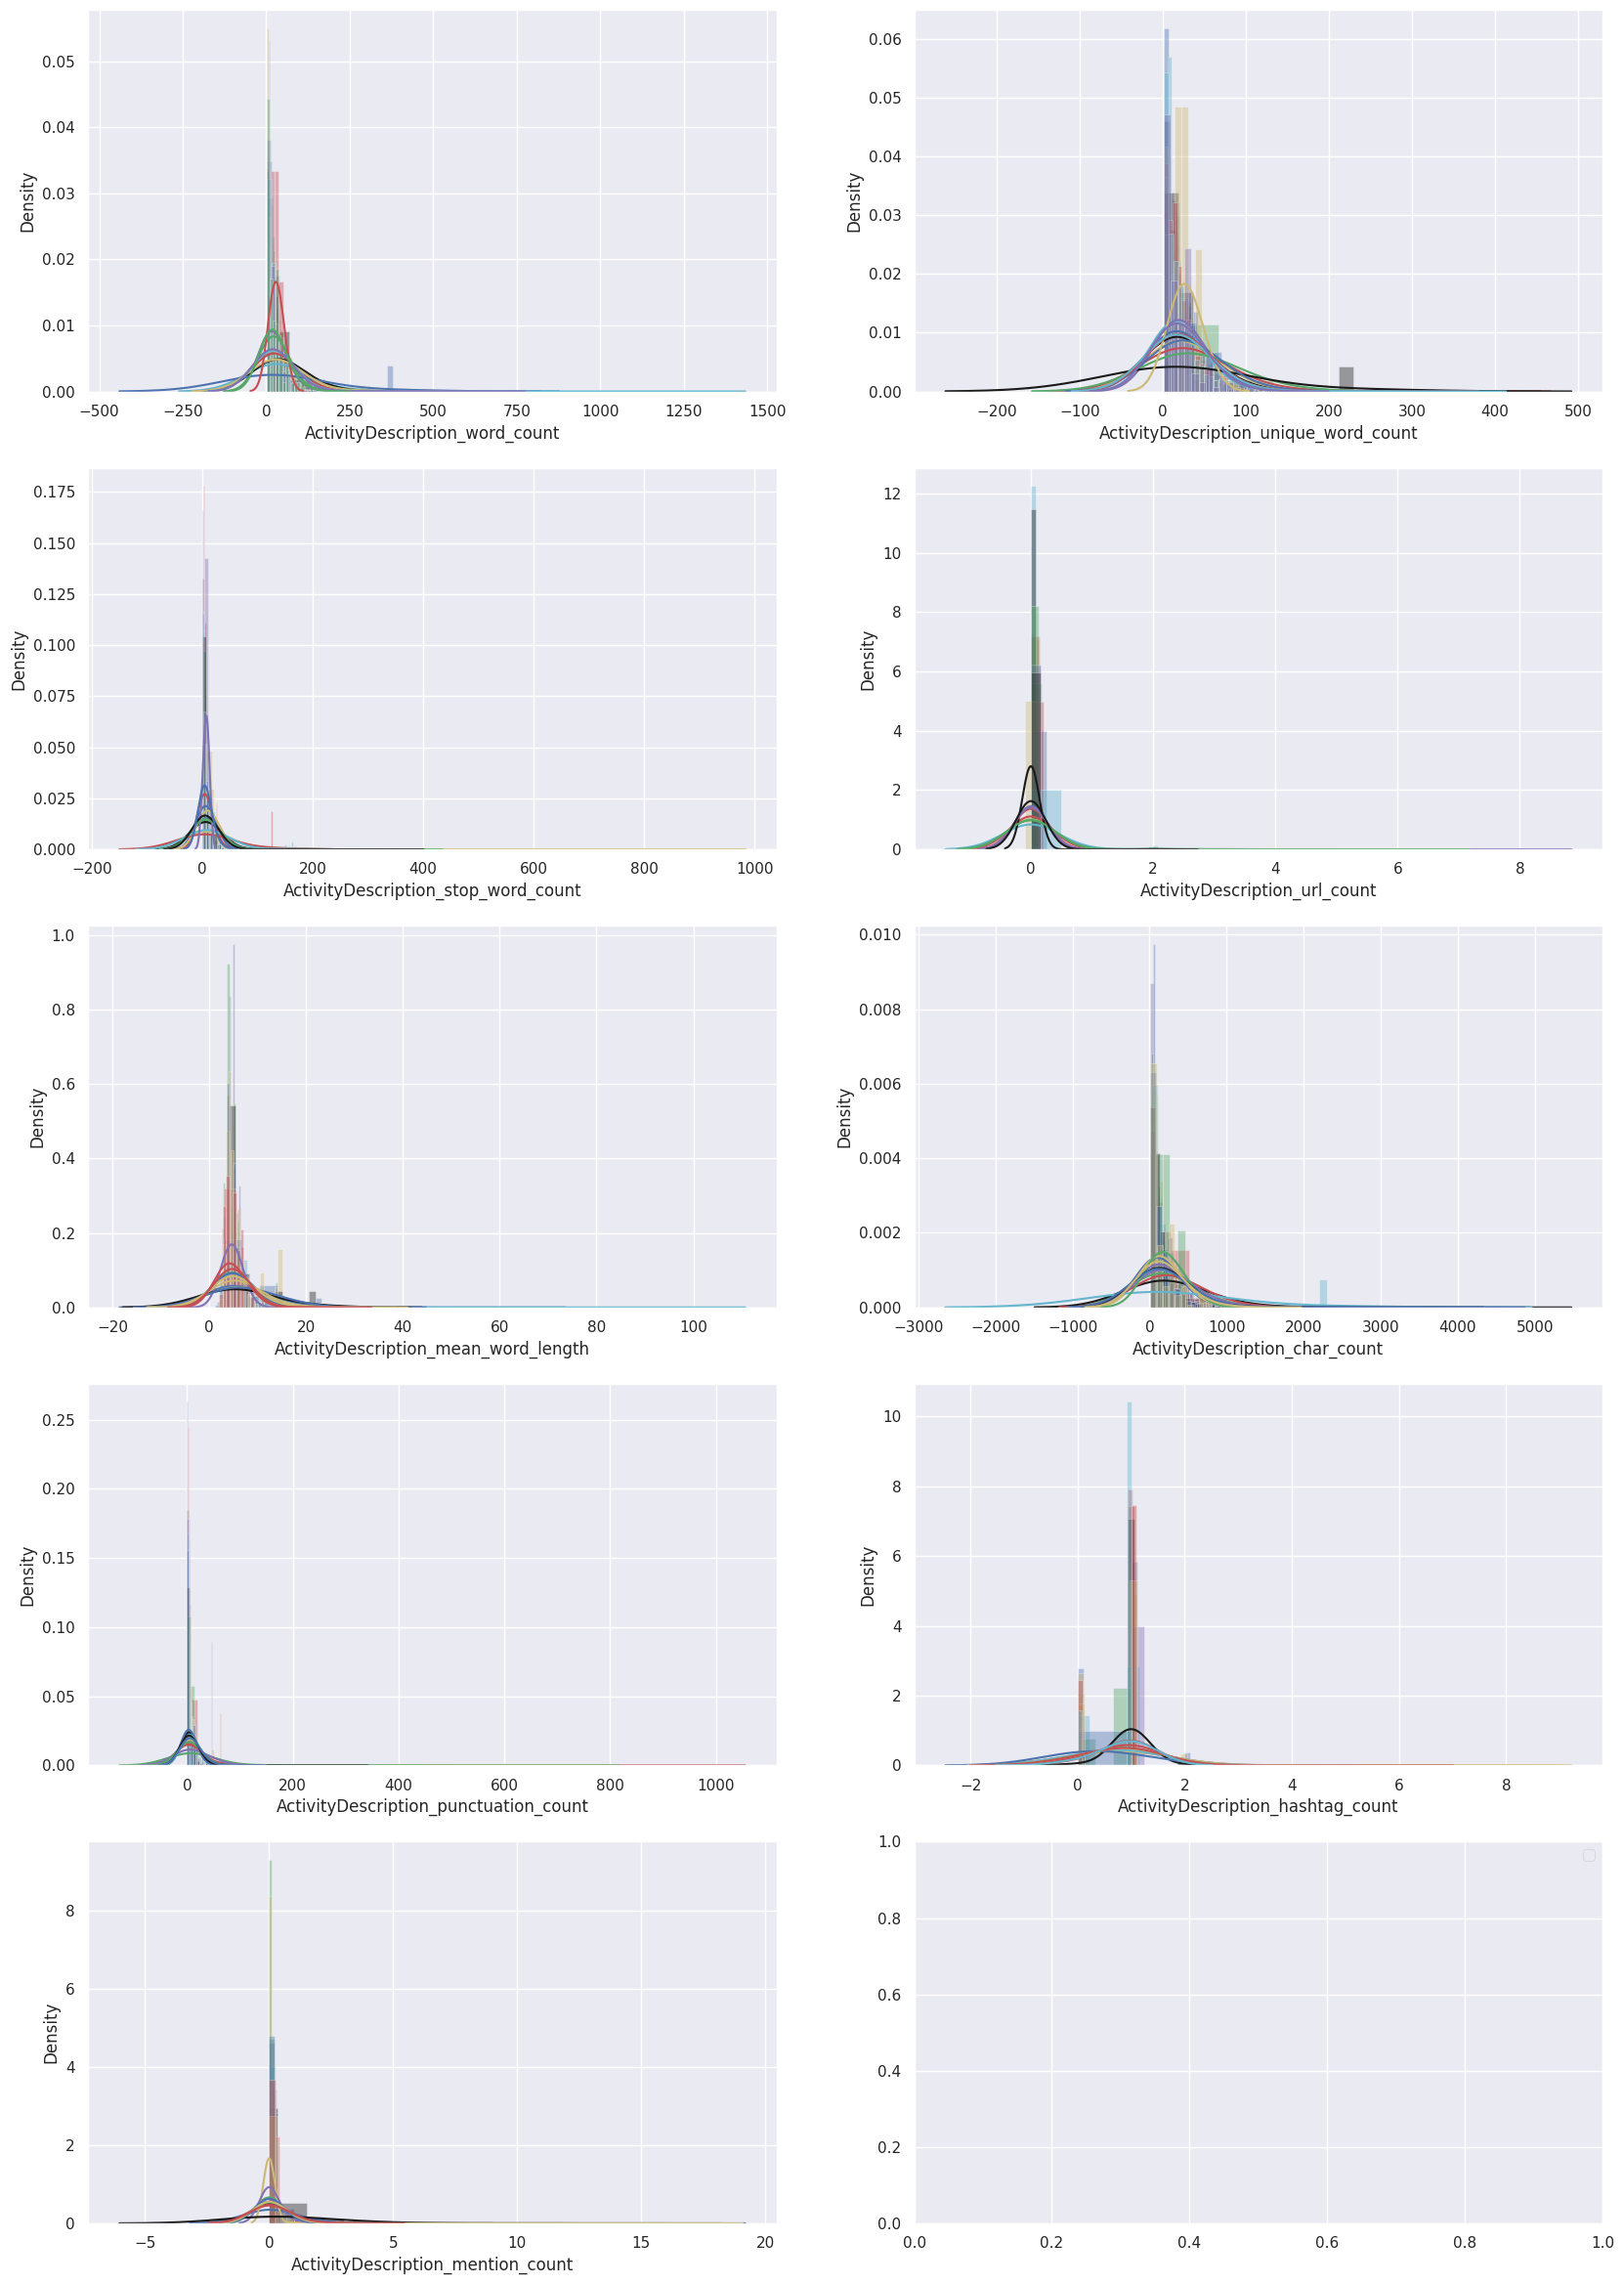

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in ActivityDescription column. Please be patient since this is a large dataset with >100K rows...
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 351 seconds

For target = OpportunityStageName

    For class = 0
Top 200 n-grams
: ['notrespond', 'call', 'not', 'fs', 'said', 'he', 'followup', 'will', 'mister', 'but', 'no', 'fscall', 'ring', 'busi', 'respons', 'they', 'demo', 'client', 'ask', 'respond', 'him', 'dear', 'requir', 'back', 'updat', 'use', 'regard', 'discuss', 'answer', 'user', 'as', 'spoke', 'your', 'we', 'time', 'tomorrow', 'had', 'mail', 'number', 'contact', 'pleas', 'our', 'propos', 'confirm', 'fieldsens', 'slam', 'tri', 'told', 'do', 'if', 'word', 'inform', 'team', 'after', 'disconnect', 'need', 'their', 'sir', 'kindli', 'meet', 'receiv', 'go', 'order', 'share', 'email', 'thank', 'check', 'appl

In [ ]:
nlp_column = 'ActivityDescription'
target = 'OpportunityStageName'
train_nlp,test_nlp, nlp_transformer, preds =Auto_NLP(
    nlp_column, train,test,target,score_type='balanced_accuracy',
    modeltype='Classification',top_num_features=300, verbose=2,
    build_model=True)